# Graphs
A graph is a set of vertices and edges that form connections between the vertices. In a more formal approach, a `graph G` is an ordered pair of a `set V` of vertices and a `set E` of edges given as `G = (V, E)` in formal mathematical notation.

Graph types covered on this notebook.

<b>References and resources:</b>
- Python Data Structures and Algorithms by Benjamin Baka
- [Two way to represent graphs](https://www.youtube.com/watch?v=HDUzBEG1GlA&index=6&list=PLj8W7XIvO93qsmdxbaDpIvM1KCyNO1K_c)
    - [Graph adjacency list](https://github.com/joeyajames/Python/blob/master/graph_adjacency-list.py)
    - [Graph adjacency matrix](https://github.com/joeyajames/Python/blob/master/graph_adjacency-matrix.py)
- http://www.csl.mtu.edu/cs2321/www/newLectures/24_Graph_Terminology.html
- [Wikipedia](https://en.wikipedia.org/wiki/Graph_theory#Computer_science)

<b>Tools:</b>
- [Create graph images](https://www.draw.io/)

In [ ]:
# # Uncomment to use inline pythontutor

# from IPython.display import IFrame

# IFrame('http://www.pythontutor.com/visualize.html#mode=display', height=1500, width=750)

In [1]:
from IPython.display import Image
import os

os.chdir(os.path.abspath(os.path.join(os.getcwd(), 'static')))

<b>Graph terminology:</b>
- <b>Node of vertex:</b> A point, usually represented by a dot in a graph. The vertices or nodes are `a`, `b` and `c` if we refer to mixed graph below.

- <b>Edges:</b> Edges are the connection between two vertices. The line connecting `a` and `b` in the mixed graph above is an example of an edge. They are also called arcs. They can be represented by (u, v) and are either:
    - Directed if the pairs are ordered (u, v)
        - u the origin
        - v the destination

    - Undirected if the pairs are unordered
    - <b>Edge Types:</b>
    
        - Outgoing edges of a vertex are directed edges that the vertex is           the origin. 
        - Incoming edges of a vertex are directed edges that the vertex is           the destination.
        - Out-degree, outdeg(v), is the number of outgoing edges. 
        - In-degree, indeg(v), is the number of incoming edges.
        - Parallel edges or multiple edges are edges of the same type and           end-vertices 

- <b>Loop:</b> When an edge from a node incidents on itself, that edge forms a loop.

- <b>Degree of a vertex:</b> This is the number of vertices that are incident on a given vertex. The degree of `b` in the mixed graph example is 2.

- <b>Adjacency:</b> This refers to the connection(s) between a node and its neighbor. The node `a` is adjacent to `b` in the mixed graph example because there is an edge between them.

- <b>Path:</b> A sequence of vertices where each adjacent pair is connected by an edge.

- <b>Dense:</b> A graph where the number of edges is almost equal to the number of vertices squared. Almost every vertex is connected to every other vertex. |E| = |V|<sup>2</sup>

- <b>Sparse:</b> A sparse graph is about |E| = |V| where the number of edges is about the same number of vertices.

# Type of Graphs

<b>Directed graph:</b> In directed graphs, the edges provide oritentation in addition to connecting the nodes. This means the edges which will be drawn with lines with an arrow to point at which direction the edge connects the two nodes.

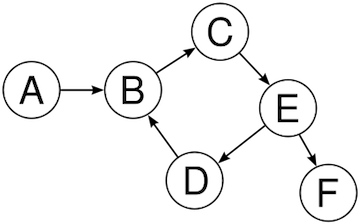

In [2]:
Image(filename='directed_graph.png')

<b>Undirected graph:</b> An undirected graph simply represents edges and lines between the nodes. There is no additional informtion about the relationship between the nodes then the face that they are connected.

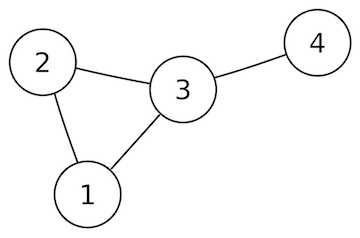

In [3]:
Image(filename='undirected_graph.png')

<b>Mixed graph:</b> A mixed graph contains edges that are both directed or undirected

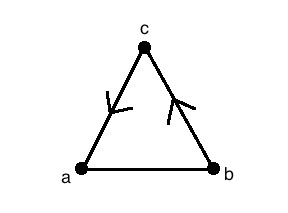

In [4]:
Image(filename='mixed_graph.png')

<b>Weighted Graphs:</b> A weighted graph has additional information on its edges. This can be a numerical value as seen here. For example these could represent the seconds it takes to traverse each edge.

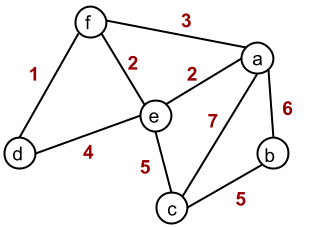

In [5]:
Image(filename='weighted_graph.png')

<b>Graph Representation</b>

Graphs can be represented in two forms. One way is to use an adjacency list and the other to use a adjacency matrix. 

When given an adjacency list if should be possible a matching adjacency matrix

In [6]:
# Using the undirected graph example to come up with an adjacency list

graph ={
    1: [2, 3],
    2: [1, 3],
    3: [1, 2, 4],
    4: [3],    
}

matrix_elements = sorted(graph.keys())
cols = rows = len(matrix_elements)

adjacency_matrix = [[0 for x in range(rows)] for y in range(cols)]
edges_list = []

for key in matrix_elements:
    for neighbor in graph[key]:
        edges_list.append((key, neighbor))
        
for edge in edges_list:
    index_of_first_vertices = matrix_elements.index(edge[0])
    index_of_second_vertices = matrix_elements.index(edge[1])
    adjacency_matrix[index_of_first_vertices][index_of_second_vertices] = 1

"""
Showing our graph dict(adjacency list) to compare to our matrix below.
What values are shown in the list mean there is a corresponding edge to 
that node.
"""
print(*[[k,v] for k,v in graph.items()], sep='\n')

[1, [2, 3]]
[2, [1, 3]]
[3, [1, 2, 4]]
[4, [3]]


In [7]:
"""
Here we see the how each node corresponds to another. 1 meaning there
is an edge, 0 meaning not.

For a weighted graph we can replace the 1's for 
the weighted value of the graph.
"""

print('   ', [x for x in range(1,5)])
print(*[[k,v] for k,v in dict(zip([1,2,3,4],adjacency_matrix)).items()], sep='\n')

    [1, 2, 3, 4]
[1, [0, 1, 1, 0]]
[2, [1, 0, 1, 0]]
[3, [1, 1, 0, 1]]
[4, [0, 0, 1, 0]]


<b>Which is better?</b>

<b>List:</b>
 - Pros: Faster and uses less space for sparse graphs
 - Cons: Slower for dense graphs
 
<b>Matrix:</b>
 - Pros: Faster for dense graphs, simpler for weighted edges
 - Cons: Uses more space

<b>Graph adjacency list</b>

In [14]:
class Vertex:
    
    def __init__(self, n):
        self.name = n
        self.neighbors = list()
    
    
    def add_neighbor(self, v):
        if v not in self.neighbors:
            self.neighbors.append(v)
            self.neighbors.sort()

class Graph:
    vertices = {}
    
    def add_vertex(self, vertex):
        if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
            self.vertices[vertex.name] = vertex
            return True
        else:
            return False
    
    
    def add_edge(self, u, v):
        if u in self.vertices and v in self.vertices:
            self.vertices[u].add_neighbor(v)
            self.vertices[v].add_neighbor(u)
            return True
        else:
            return False
            
            
    def print_graph(self):
        for key in sorted(list(self.vertices.keys())):
            print(key + ' ' + str(self.vertices[key].neighbors))
            
    
    def make_dict(self):
        list_dict = {}
        for key in sorted(list(self.vertices.keys())):
            list_dict[key] = (self.vertices[key].neighbors)
        return list_dict

            
h = Graph()
a = Vertex('A')
h.add_vertex(a)
h.add_vertex(Vertex('B'))
for i in range(ord('A'), ord('I')):
    h.add_vertex(Vertex(chr(i)))

edges = [
    'AB', 'AD', 'AG', 'BA', 
    'BE', 'BF', 'CF', 'CH',
    'DA', 'DF', 'EB', 'EG',
    'FB', 'FC', 'FD', 'GA',
    'GE', 'HC',
]
for edge in edges:
    h.add_edge(edge[:1], edge[1:])

h.make_dict()

{'A': ['B', 'D', 'G'],
 'B': ['A', 'E', 'F'],
 'C': ['F', 'H'],
 'D': ['A', 'F'],
 'E': ['B', 'G'],
 'F': ['B', 'C', 'D'],
 'G': ['A', 'E'],
 'H': ['C']}

<b>Graph adjacency matrix</b> 

In [9]:
class Vertex:
    def __init__(self, n):
        self.name = n

        
class Graph:
    vertices = {}
    edges = []
    edge_indices = {}
    
    
    def add_vertex(self, vertex):
        if isinstance(vertex, Vertex) and vertex.name not in self.vertices:
            self.vertices[vertex.name] = vertex
            for row in self.edges:
                row.append(0)
            self.edges.append([0] * (len(self.edges)+1))
            self.edge_indices[vertex.name] = len(self.edge_indices)
            return True
        else:
            return False
    
    
    def add_edge(self, u, v, weight=1):
        if u in self.vertices and v in self.vertices:
            self.edges[self.edge_indices[u]][self.edge_indices[v]] = weight
            self.edges[self.edge_indices[v]][self.edge_indices[u]] = weight
            return True
        else:
            return False
            
            
    def print_graph(self):
        for v, i in sorted(self.edge_indices.items()):
            print(v + ' ', end='')
            for j in range(len(self.edges)):
                print(self.edges[i][j], end='')
            print('')    
            
            
    def make_dict(self):
        matrix_dict = {}
        for num, k in enumerate(sorted(self.edge_indices.keys())):
            matrix_dict[k] = self.edges[num]
        return matrix_dict
            
            
g = Graph()
a = Vertex('A')
g.add_vertex(a)
g.add_vertex(Vertex('B'))
for i in range(ord('A'), ord('I')):
    g.add_vertex(Vertex(chr(i)))

edges = [
    'AB', 'AD', 'AG', 'BA', 
    'BE', 'BF', 'CF', 'CH',
    'DA', 'DF', 'EB', 'EG',
    'FB', 'FC', 'FD', 'GA',
    'GE', 'HC',
]

for edge in edges:
    g.add_edge(edge[:1], edge[1:])

g.make_dict()

{'A': [0, 1, 0, 1, 0, 0, 1, 0],
 'B': [1, 0, 0, 0, 1, 1, 0, 0],
 'C': [0, 0, 0, 0, 0, 1, 0, 1],
 'D': [1, 0, 0, 0, 0, 1, 0, 0],
 'E': [0, 1, 0, 0, 0, 0, 1, 0],
 'F': [0, 1, 1, 1, 0, 0, 0, 0],
 'G': [1, 0, 0, 0, 1, 0, 0, 0],
 'H': [0, 0, 1, 0, 0, 0, 0, 0]}

# Traversal

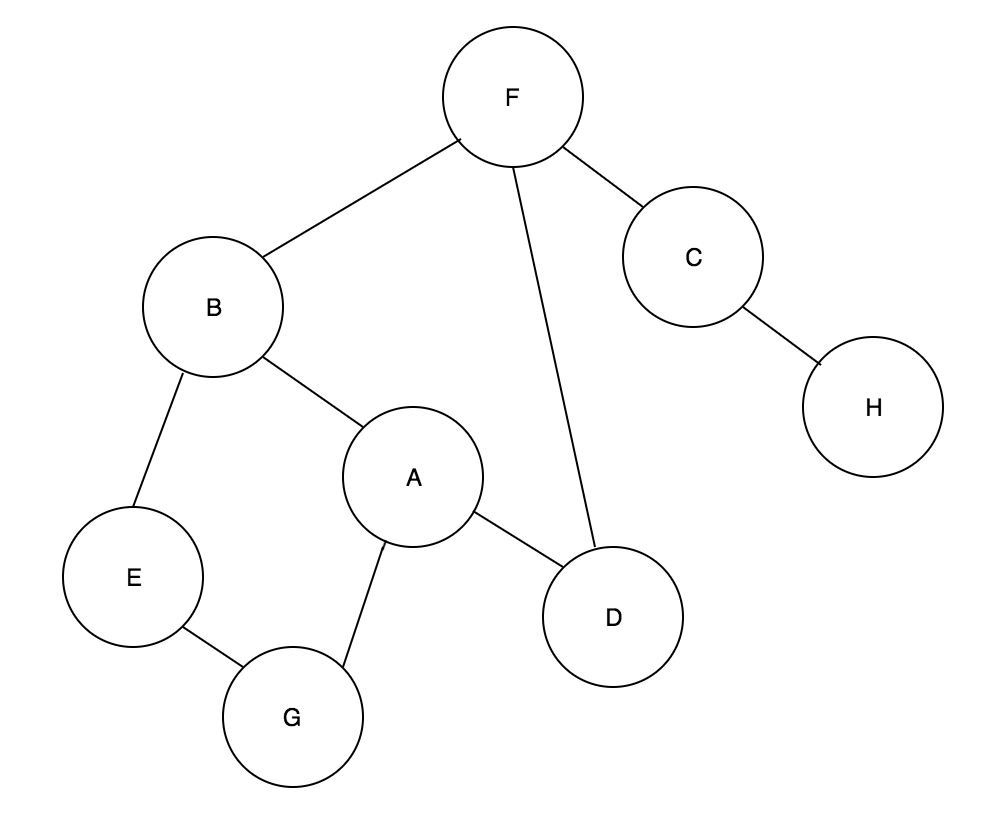

In [10]:
Image(filename='search.png', width=400, height=400)

In [15]:
from collections import deque

to_traverse = h.make_dict()
to_traverse

{'A': ['B', 'D', 'G'],
 'B': ['A', 'E', 'F'],
 'C': ['F', 'H'],
 'D': ['A', 'F'],
 'E': ['B', 'G'],
 'F': ['B', 'C', 'D'],
 'G': ['A', 'E'],
 'H': ['C']}

<b>Breadth-first search</b>

Breadth-first search algorithm starts at a node then chooses that node or tertex as its root node then visits its neighboring nodes. It then explores neighbors on the next level of the graph.

In [16]:
from collections import deque

def breadth_first_search(graph, root):
    visited_vertices = []
    graph_queue = deque([root])
    visited_vertices.append(root)
    node = root
    
    while graph_queue:
        node = graph_queue.popleft()
        adj_nodes = graph[node]
        remaining_elements = set(adj_nodes).difference(set(visited_vertices))
        if remaining_elements:
            for elem in sorted(remaining_elements):
                visited_vertices.append(elem)
                graph_queue.append(elem)
    return visited_vertices
            

In [17]:
breadth_first_search(to_traverse, 'A')

['A', 'B', 'D', 'G', 'E', 'F', 'C', 'H']

<b>Depth-first search</b>

This algorithm traverses the depth of any particular path in the graph before traversing its breadth. Child nodes are visited first before sibling nodes. it works o finite graphs and requires the use of a stack to maintain the state of the algorithm.

Depth first searches find application in solving maze problems, finding connected components and finding the bridges of a graph among others.

In [18]:
def depth_first_search(graph, root):
    visited_vertices = []
    graph_stack = []
    
    graph_stack.append(root)
    node = root
    
    while len(graph_stack) > 0:
        
        if node not in visited_vertices:
            visited_vertices.append(node)
        
        adj_nodes = graph[node]
            
        if set(adj_nodes).issubset(set(visited_vertices)):
            graph_stack.pop()
            if len(graph_stack) > 0:
                node = graph_stack[-1]
            continue
            
        else:
            remaining_elements = set(adj_nodes).difference(visited_vertices)  
            
        first_adj_node = sorted(remaining_elements)[0]
        graph_stack.append(first_adj_node)
        node = first_adj_node
    return visited_vertices
                
        

In [19]:
depth_first_search(to_traverse, 'A')

['A', 'B', 'E', 'G', 'F', 'C', 'H', 'D']